# Web Scraping

Web scraping Blogs, foros, sitios oficiales de datos, etc. Función de recopilar esa información: comparación de precios, análisis de opinión sobre productos/servicios, chatbots, etc. No hay tenemos límite en cuanto creatividad de trabajar con la información. Existen sitios donde tienen derechos de autor, habrá que tener cuidado. Hay más sitios que tienen un concepto datos libres: cada vez más organizaciones tienen secciones de datos (csv, bd, xslx, json)

Hay 3 formatos: Fuentes de información:

* Paginas web pueden incluir: csv, json, xml, etc.
* API-REST json, xml
* Páginas que contienen la información en formato "humano": python tiene varias librerias:
    1. Acceder por medio de una URL, descarga inforamción y luego podemos utlizar desde python un paquete: **BeautifulSoup**
    2. Si requiere realizar un proceso en la información (extra) entonces se utiliza un paquete: **Selenium** (permite desde python hacer todo como si estuvieramos en el navegador)
    3. Python: **requests**
    
Resumiendo: 

* Archivos incluidos en la página web : requests, csv, json, etc. 
* API-REST : Requests 
* Datos incrustados en la página web (incluidos): BeautifilSoup 
* Datos que requieren de proceso/interacción: Selenium.

Archivos incluidos en la página web: URI, IRL, URN

**URI (Uniform Resource Identifier):** cadena de caracteres que identifica un recurso. 

Sintaxis general: schema:[//[user[:passwd]@host[:port]][/path][?query][#tag]]

* https://es.wikipedia.org/wiki/Pandemia_de_COVID-19
* https://es.wikipedia.org/wiki/Pandemia_de_COVID-19#Am%C3%A9rica
* https://www.youtube.com/watch?V=183IwSzCgV4

URI se divide en dos partes: URL y URN

* URL (uniform resource lcoator) direcciones en la www
    * ftp://teclaguna.edu.mx
* URN (Uniform Resource Name)
    * urn:isbn:0451450523




In [4]:
#Archivos incluidos en la página web
import requests
url = "http://www.gutenberg.org/ebooks/1112.txt.utf-8"
resp = requests.get(url)
print(resp) #https://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html

<Response [200]>


In [5]:
path = "C:\\Users\\jmas_\\Jupyter\\Datasets\\"
with open(path + "ryj.text", "wb") as arch:
    arch.write(resp.content)

In [6]:
import urllib.request
signos = ",*./#[] "
cuenta = 0
pal = [] #Lista
with urllib.request.urlopen("http://www.gutenberg.org/ebooks/1112.txt.utf-8") as info:
    for linea in info.readlines():
        limpia = linea.decode("utf-8").lower()
        for s in signos:
            limpia = limpia.replace(s, " ") #Gracias Octavio!!!
            #cuenta = cuenta + 1
        #extend append en la lista
        pal.extend(limpia.split())
#print(cuenta)
print(len(pal))
#print(pal)

29174


In [7]:
tabla = str.maketrans({letra: None for letra in ",*./#[] "})
"The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare".translate(tabla)

'TheProjectGutenbergEBookofRomeoandJulietbyWilliamShakespeare'

In [8]:
#Otra manera: expresiones regulares
apellido = ("capulet", "montague")
nombres = ("romeo", "juliet", "tybalt", "mercutio")

In [9]:
ap = {a: pal.count(a) for a in apellido}
no = {n: pal.count(n) for n in nombres}

In [10]:
print(ap)
print(no)

{'capulet': 29, 'montague': 26}
{'romeo': 111, 'juliet': 56, 'tybalt': 47, 'mercutio': 19}


In [11]:
ap.values()

dict_values([29, 26])

In [12]:
#Ahora a graficar :) 
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Frecuencia de familias rivales')

<Figure size 576x396 with 0 Axes>

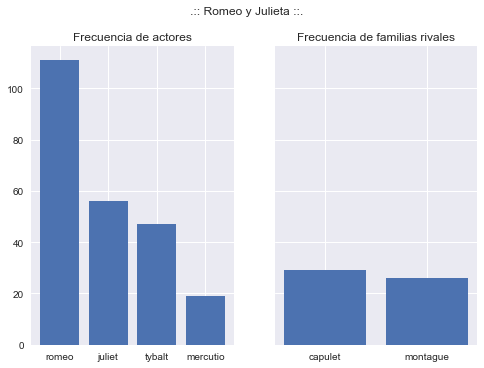

In [13]:
#estilo
plt.style.use("seaborn")
#Crear una figura
fig = plt.figure()
fig, axes = plt.subplots(1, 2, sharey = True)
fig.suptitle(".:: Romeo y Julieta ::.")
plt.sca(axes[0]) #activamos el plot
#plt.xticks(rotation=30) #rotar las llaves
axes[0].bar(no.keys(), no.values())
axes[0].set_title("Frecuencia de actores")
axes[1].bar(ap.keys(), ap.values())
axes[1].set_title("Frecuencia de familias rivales")

In [14]:
#Tiempo real : Calidad del aire <<Madrid>>
#Formato de archivo:
#Columnas 0, 1, 2: estación meteorológica
#Columnas 3, 4 y 5: valor medido.Columna 3: oxido de nitrógeno 12
#Columnas 6, 7 y 8: año, mes, dia
#Columnas 9-56 datos especificos de la calidad del aire pero están en pares
#vaciar (hora), verificación V Ok, N -no validado
url = "http://www.mambiente.madrid.es/opendata/horario.txt"
import requests
resp = requests.get(url)
print(resp)

<Response [200]>


In [15]:
path = "C:\\Users\\jmas_\\Jupyter\\Datasets\\"
with open(path + "horario.txt", "wb") as arch:
    arch.write(resp.content)

In [16]:
#--------------------------------------------------------------
#Expresiones regulares: regex
#regex tiene varios métodos
#findall, search, split, sub
#match...
#Estudiar metacaracteres y secuencias especiales
import re

In [17]:
texto = """Hugo Donald 871-000-00-00,Paco Donald 871-000-11-11,Luis Donald 871-000-22-22"""
personas = re.split("\,+", texto)

In [18]:
personas

['Hugo Donald 871-000-00-00',
 'Paco Donald 871-000-11-11',
 'Luis Donald 871-000-22-22']

In [19]:
print(re.search("H", texto))

<re.Match object; span=(0, 1), match='H'>


In [20]:
print(re.search("Wilson", texto))
#--------------------------------------------------------------------

None


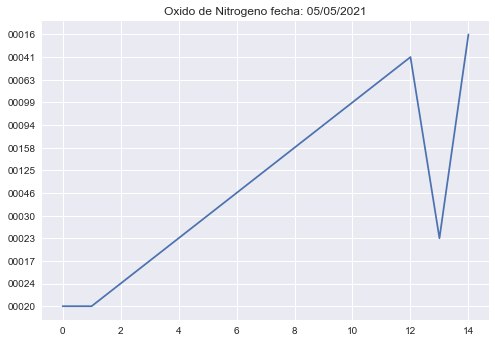

In [22]:
import matplotlib.pyplot as plt
import csv
with open (path+"horario.txt") as arch:
    lector = csv.reader(arch, delimiter = ",")
    for linea in lector:
        if linea[3] == '12':
            plt.title("Oxido de Nitrogeno fecha: " +linea[8]+"/" + linea[7]+"/" +linea[6])
            hora = 0
            col = 9
            lista = [] #Datos de ON NO2
            horas = [] #Horario
            while hora <= 23:
                if linea[col+2*hora+1] == "V": #V = valido
                    lista.append(linea[col+2*hora])
                    horas.append(hora)
                hora = hora + 1
plt.plot(horas, lista)
plt.show()
            

In [24]:
#Datos que forman parte de una pagina web
#html
#Biblioteca/módilo BeautifulSoup ayuda analizar datos en página web (html)
#MiEjemplo
from bs4 import BeautifulSoup
url = "C:\\Users\\jmas_\\Jupyter\\Datasets\\prueba.html"
with open(url, "r") as arch:
    pag = arch.read()

In [25]:
print(pag)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Un mini ejemplo html</title>
</head>
<body>
    <div id="date">Fecha: 05/05/2021</div>
    <div id="hi">Hola Mundo!</div>
</body>
</html>


In [26]:
type(pag)    

str

In [27]:
sopas = BeautifulSoup(pag, "html.parser") #html5lib
print(sopas.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Un mini ejemplo html
  </title>
 </head>
 <body>
  <div id="date">
   Fecha: 05/05/2021
  </div>
  <div id="hi">
   Hola Mundo!
  </div>
 </body>
</html>
